# `magplots` Examples

In [1]:
# # Install if needed:
# pip install magplots

# from magplots.magFunctions import * # packaged version
from magFunctions import * # local version
import numpy as np
import datetime

/home/pliny/.local/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### `fill_nan()`: Fits a linear regression to NaN values in a vector.

In [2]:
y = np.array([40, 41, np.nan, 43, np.nan, 41])
fill_nan(y)

array([40.        , 41.        , 41.18644068, 43.        , 41.69491525,
       41.        ])

### `reject_outliers()`: Replaces outliers with NaN. (Used to eliminate power cycling artifacts.)

In [3]:
help(reject_outliers)

Help on function reject_outliers in module magFunctions:

reject_outliers(y)
    Function to reject outliers from a 1D dataset.
    
    Arguments:
        y      : 1D numpy array
    
    Returns:
        array with outliers replaced with NaN



In [4]:
reject_outliers(np.append(y, [-51e100, 41, 2, 45], axis=0))

array([40.        , 41.        , 41.18644068, 43.        , 41.69491525,
       41.        ,         nan, 41.        ,  2.        , 45.        ])

###  `magfetch()`: Pulls magnetometer data.

In [5]:
magfetch(start = datetime.datetime(2016, 1, 24, 0, 0, 0), end = datetime.datetime(2016, 1, 25, 0, 0, 0), 
    magname = 'pg1', 
    resolution = '1sec'
)

100% [..........................................................................] 8211855 / 8211855


{'UT': array([datetime.datetime(2016, 1, 24, 0, 0, 0, 1000),
        datetime.datetime(2016, 1, 24, 0, 0, 1, 1000),
        datetime.datetime(2016, 1, 24, 0, 0, 2, 1000), ...,
        datetime.datetime(2016, 1, 24, 23, 59, 57, 1000),
        datetime.datetime(2016, 1, 24, 23, 59, 58, 1000),
        datetime.datetime(2016, 1, 24, 23, 59, 59, 1000)], dtype=object),
 'UT_1': array([1.45359e+09, 1.45359e+09, 1.45359e+09, ..., 1.45368e+09,
        1.45368e+09, 1.45368e+09]),
 'MAGNETIC_NORTH_-_H': array([10.25, 10.5 , 10.75, ..., -9.87, -9.87, -9.99]),
 'MAGNETIC_EAST_-_E': array([-570.86, -571.11, -571.11, ..., -624.36, -624.36, -624.36]),
 'VERTICAL_DOWN_-_Z': array([61.98, 61.98, 61.98, ..., 77.29, 77.29, 77.29])}

###  `magfetchtgo`: Called by `magfetch` for Arctic magnetometers. Pulls data from the Tromsø Geophysical Observatory. Requires a password.
Save the password locally in the file tgopw.txt.

In [6]:
magfetch(is_verbose=True)


Found Tromsø Geophysical Observatory password.
Data for atu collected: 1441 samples.


{'UT': array([datetime.datetime(2016, 1, 24, 0, 0),
        datetime.datetime(2016, 1, 24, 0, 1),
        datetime.datetime(2016, 1, 24, 0, 2), ...,
        datetime.datetime(2016, 1, 24, 23, 58),
        datetime.datetime(2016, 1, 24, 23, 59),
        datetime.datetime(2016, 1, 25, 0, 0)], dtype=object),
 'MAGNETIC_NORTH_-_H': array([999.9999, 999.9999, 999.9999, ..., 999.9999, 999.9999, 999.9999]),
 'MAGNETIC_EAST_-_E': array([99999.9, 99999.9, 99999.9, ..., 99999.9, 99999.9, 99999.9]),
 'VERTICAL_DOWN_-_Z': array([99999.9, 99999.9, 99999.9, ..., 99999.9, 99999.9, 99999.9])}

In [7]:
help(magfetch)

Help on function magfetch in module magFunctions:

magfetch(start=datetime.datetime(2016, 1, 24, 0, 0), end=datetime.datetime(2016, 1, 25, 0, 0), magname='atu', is_verbose=False, tgopw='', resolution='1sec')
    MAGFETCH 
        Function to fetch data for a given magnetometer. Pulls from ai.cdas or DTU.
    
        Arguments:
            start, end   : datetimes of the start and end of sampled data range.
            magname      : IAGA ID for magnetometer being sampled. e.g.: 'upn'
            is_verbose   : Boolean for whether debugging text is printed.
            tgopw        : Password for Tromsø Geophysical Observatory
            resolution   : Data resolution for TGO data.
    
        Returns:
            df           : pandas dataframe with columns ['UT', 'MAGNETIC_NORTH_-_H', 'MAGNETIC_EAST_-_E', 'VERTICAL_DOWN_-_Z']



###  `magdf()`: Function to create multi-indexable dataframe of all mag parameters for a given period of time. 
It can save .csv files as well. If `is_saved==True`, make sure you have a folder named `/output`. 
It will check to see if you have already generated a file before recreating it, but only if `is_saved==True`.

In [8]:
df = magdf(is_verbose = True, is_saved = True)

Looks like output/2016-01-24 00:00:00_.csv has already been generated. Pulling data...


###  `magfig()`: Function to create time domain plots of conjugate magnetometers.

Plotting data for 6 magnetometers: 2016-01-24 00:00:00
Plotting data for Arctic magnetometer #1: UPN
Found Tromsø Geophysical Observatory password.
Data for upn collected: 1441 samples.
Plotting data for Antarctic magnetometer #1: PG0
100% [..........................................................................] 8212030 / 8212030
Data for pg0 collected: 86400 samples.
Plotting data for Arctic magnetometer #2: UMQ
Found Tromsø Geophysical Observatory password.
Data for umq collected: 1441 samples.
Plotting data for Antarctic magnetometer #2: PG1
100% [..........................................................................] 8211855 / 8211855
Data for pg1 collected: 86400 samples.
Plotting data for Arctic magnetometer #3: GDH
Found Tromsø Geophysical Observatory password.
Data for gdh collected: 1441 samples.
Plotting data for Antarctic magnetometer #3: PG2
100% [..........................................................................] 8211999 / 8211999
Data for pg2 collected: 864

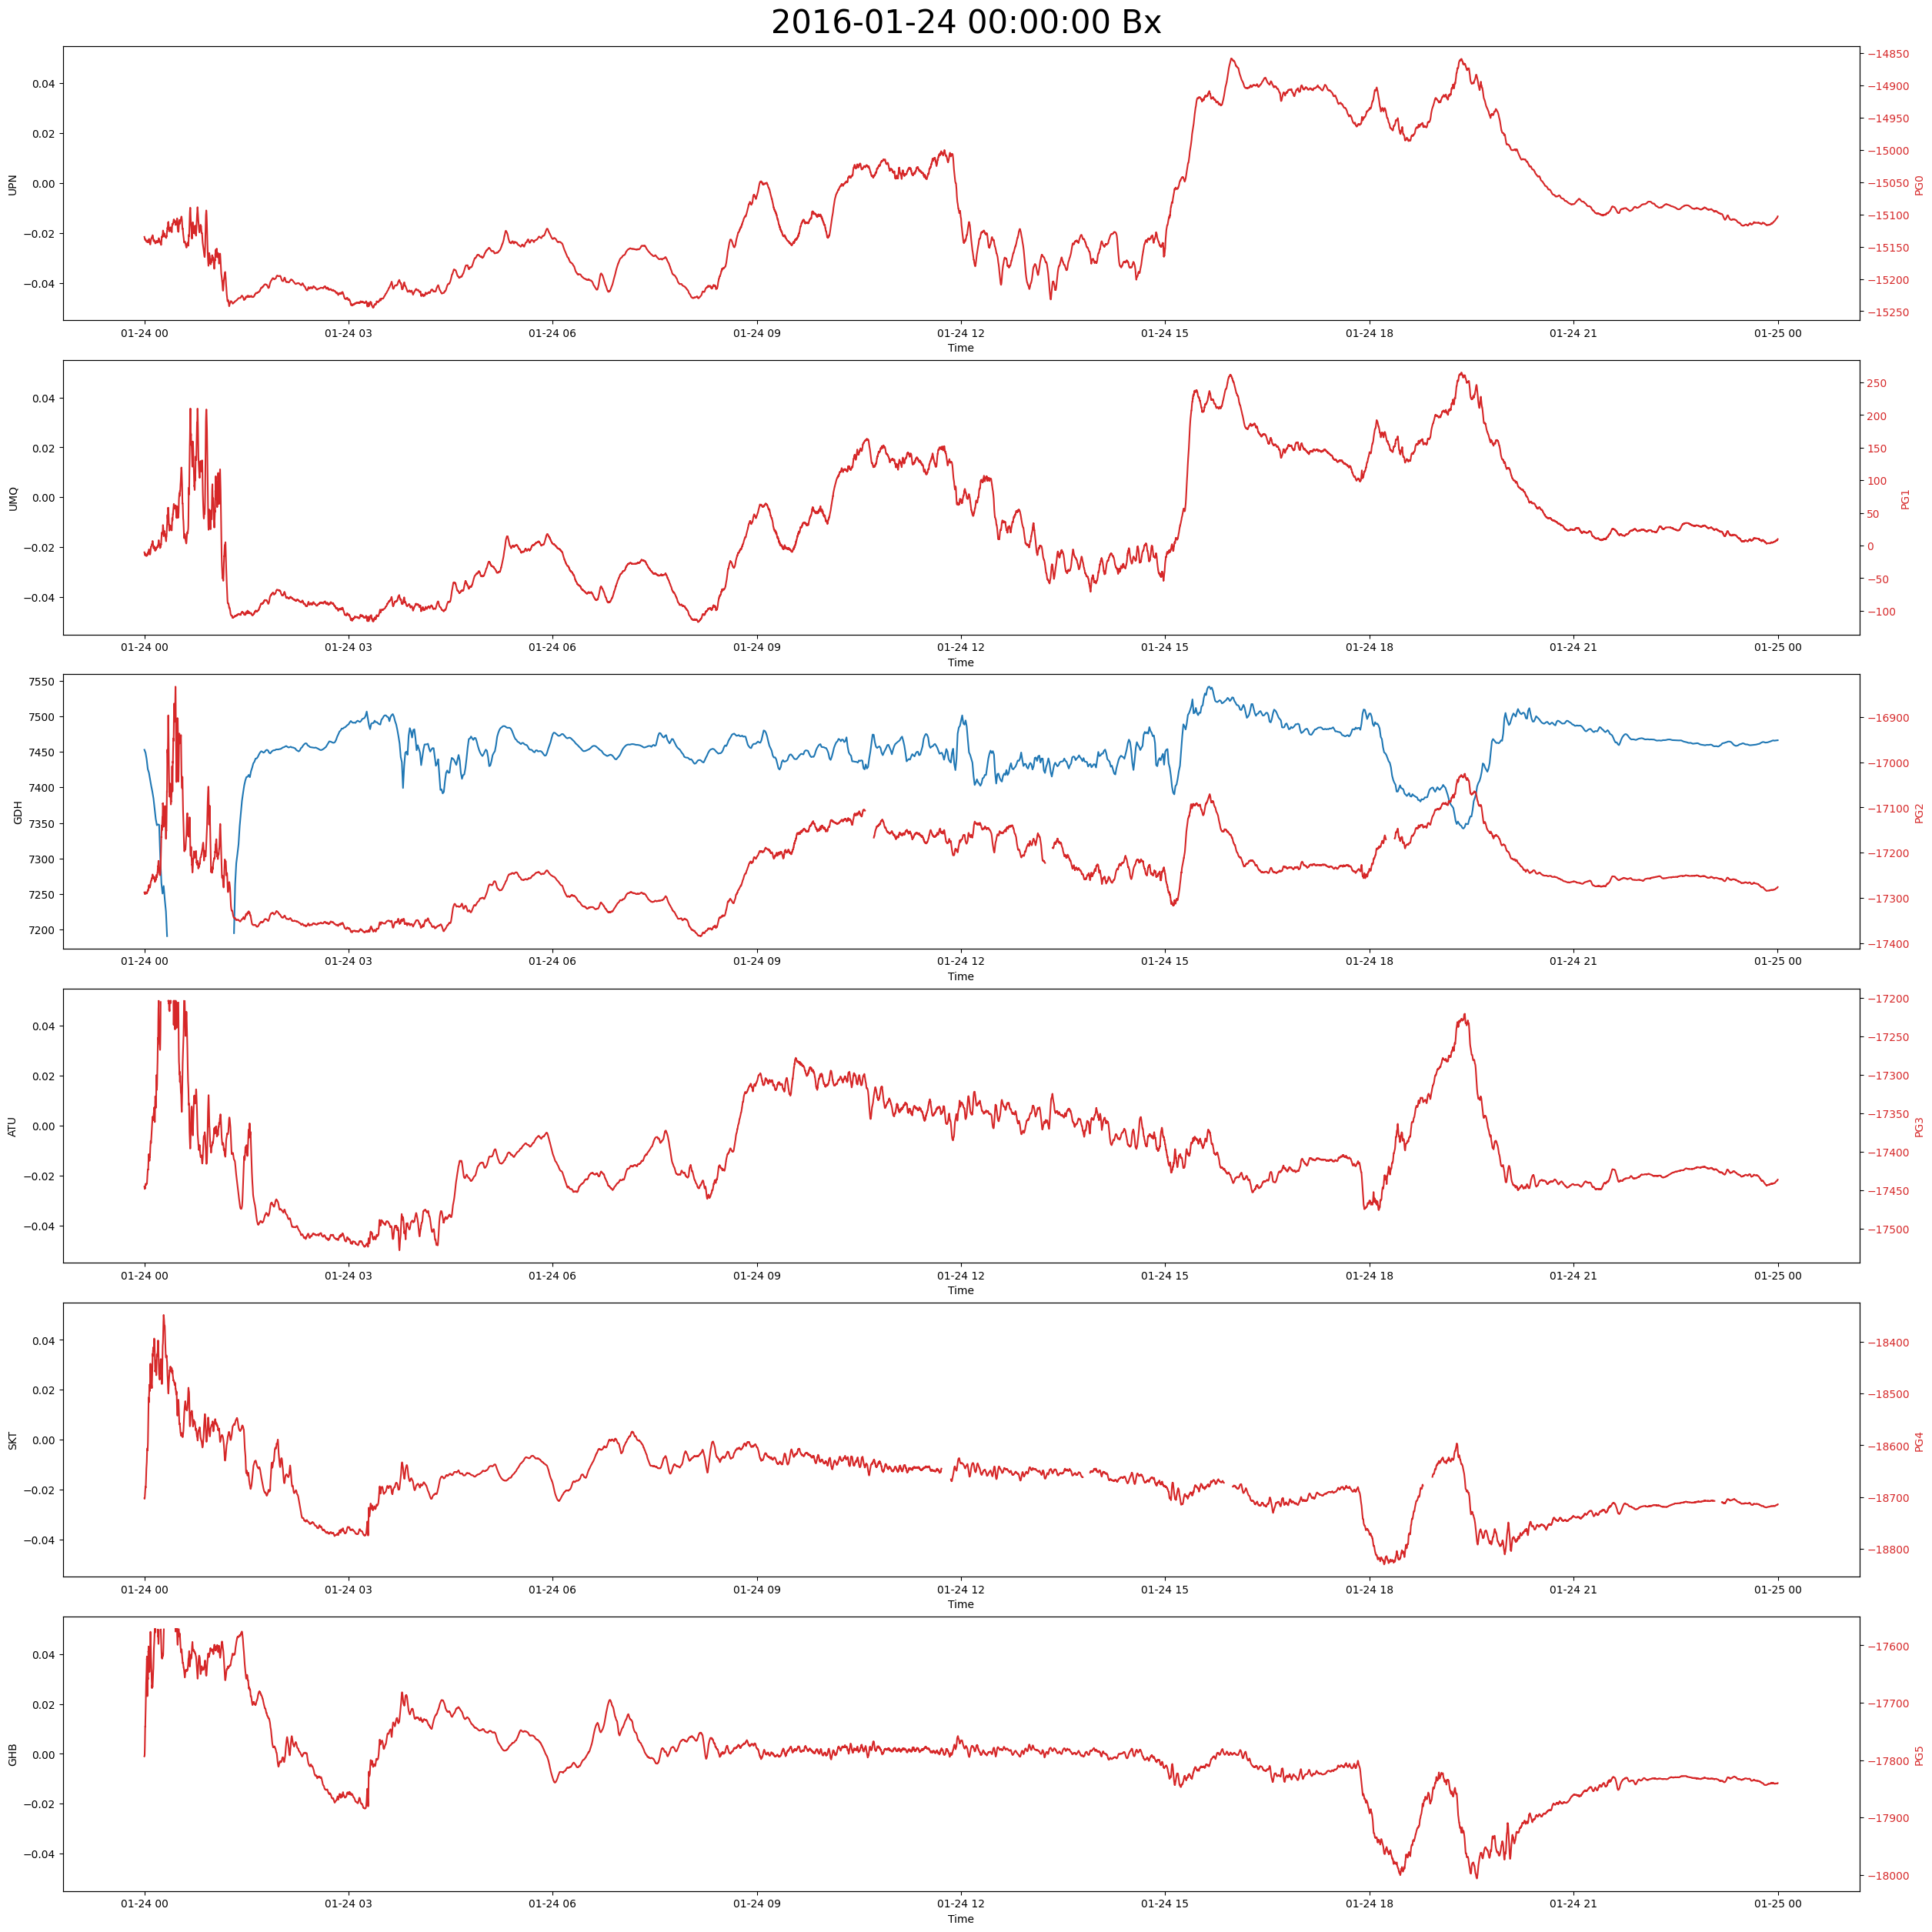

In [9]:
magfig(is_verbose = True)

In [ ]:
magspect(is_verbose = True)